In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
%matplotlib inline

In [2]:
bank_data=pd.read_csv("C:/Users/samee/OneDrive/Documents/ExcelR/Assignment-6/bank-full.csv",sep=';')

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [4]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
bank_data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [6]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<AxesSubplot:>

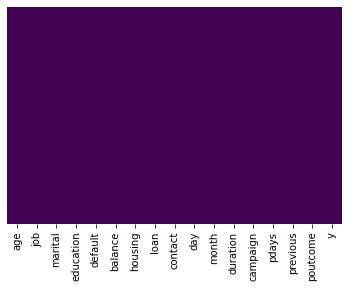

In [8]:
sns.heatmap(bank_data.isnull(),cmap='viridis',cbar=False,yticklabels=False)

In [9]:
## Converting Categorical Columns->One Hot Encoding
## job	marital	education contact poutcome month

data1=pd.get_dummies(bank_data,columns=['job','marital','education','contact',
                                        'poutcome','month'])

In [10]:
data1.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,no,2143,yes,no,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,no,29,yes,no,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,no,2,yes,yes,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,no,1506,yes,no,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,no,1,no,no,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0


In [11]:
## To see all columns

pd.set_option('display.max.columns',None)
data1.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,no,2143,yes,no,5,261,1,-1,0,no,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,44,no,29,yes,no,5,151,1,-1,0,no,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,33,no,2,yes,yes,5,76,1,-1,0,no,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,47,no,1506,yes,no,5,92,1,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,33,no,1,no,no,5,198,1,-1,0,no,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [12]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   default              45211 non-null  object
 2   balance              45211 non-null  int64 
 3   housing              45211 non-null  object
 4   loan                 45211 non-null  object
 5   day                  45211 non-null  int64 
 6   duration             45211 non-null  int64 
 7   campaign             45211 non-null  int64 
 8   pdays                45211 non-null  int64 
 9   previous             45211 non-null  int64 
 10  y                    45211 non-null  object
 11  job_admin.           45211 non-null  uint8 
 12  job_blue-collar      45211 non-null  uint8 
 13  job_entrepreneur     45211 non-null  uint8 
 14  job_housemaid        45211 non-null  uint8 
 15  job_management       45211 non-null  uint8 
 16  job_

In [13]:
data1['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [14]:
data1[['housing','loan','y']].value_counts()

housing  loan  y  
yes      no    no     19093
no       no    no     14069
yes      yes   no      4102
no       no    yes     3135
         yes   no      2658
yes      no    yes     1670
         yes   yes      265
no       yes   yes      219
dtype: int64

In [15]:
data1['housing'].unique()
data1['loan'].unique()
data1['y'].unique()

array(['yes', 'no'], dtype=object)

array(['no', 'yes'], dtype=object)

array(['no', 'yes'], dtype=object)

In [16]:
## From above observations, we can see that above columns are Binary Data

## So performing Custom Encoding of Binary o/p Variables

data1['default'] = np.where(data1['default'].str.contains("yes"), 1, 0)
data1['housing'] = np.where(data1['housing'].str.contains("yes"), 1, 0)
data1['loan'] = np.where(data1['loan'].str.contains("yes"), 1, 0)
data1['y'] = np.where(data1['y'].str.contains("yes"), 1, 0)


In [17]:
data1.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,1,0,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [18]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int32
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int32
 4   loan                 45211 non-null  int32
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  y                    45211 non-null  int32
 11  job_admin.           45211 non-null  uint8
 12  job_blue-collar      45211 non-null  uint8
 13  job_entrepreneur     45211 non-null  uint8
 14  job_housemaid        45211 non-null  uint8
 15  job_management       45211 non-null  uint8
 16  job_retired          4

## Model Building

In [19]:
X=pd.concat([data1.iloc[:,0:10],data1.iloc[:,11:]],axis=1)
Y=data1.iloc[:,10]

In [20]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [21]:
## Logistic regression Model

logreg=LogisticRegression()
logreg.fit(X_train,Y_train)




C:\Users\samee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Model Predictions

In [22]:
## Prediction on test set

Y_pred=logreg.predict(X_test)
Y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [23]:
Y_pred_df=pd.DataFrame({'actual_y':Y_test,'y_pred':Y_pred})
Y_pred_df

,actual_y,y_pred
14001,0,0
32046,1,1
13318,0,0
42991,0,0
14237,0,0
...,...,...
2666,0,0
35730,0,0
11495,0,0
20975,0,0


## Testing Model Accuracy

### Confusion Matrix

In [24]:
from sklearn import metrics

In [25]:
confusion_matrix=metrics.confusion_matrix(Y_test,Y_pred)

In [26]:
confusion_matrix

array([[11720,   249],
       [ 1256,   339]], dtype=int64)

In [27]:
## The model accuracy is calculated by (a+d)/(a+b+c+d)

(11720+339)/(11720+249+1256+339)

0.8890445296372751

In [28]:
print('Accuracy:',metrics.accuracy_score(Y_test,Y_pred))
print("Precision:",metrics.precision_score(Y_test,Y_pred))
print('Recall:',metrics.recall_score(Y_test,Y_pred))


Accuracy: 0.8890445296372751
Precision: 0.576530612244898
Recall: 0.21253918495297805


In [29]:
## Thus Accuracy of the Model is 88.9%

In [30]:
## We can see that the value of the sigmoid function always lies between 0 and 1. The value is exactly 0.5 at X=0. We can use 0.5 as the probability threshold to determine the classes. 
##If the probability is greater than 0.5, we classify it as Class-1(Y=1) 
##or else as Class-0(Y=0).

## As Accuracy: 0.889 which is greater than 0.5,
## Thus [:,1] Threshold value>0.5=1

logreg.predict_proba(X)[:,1]

array([0.04069029, 0.02483399, 0.01834868, ..., 0.65684049, 0.07321123,
       0.30056395])

In [31]:
logreg.predict_proba(X_test)[::,1]

array([1.07593048e-04, 7.62714025e-01, 1.91335564e-02, ...,
       5.09658980e-02, 1.18411121e-01, 5.49030772e-02])

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

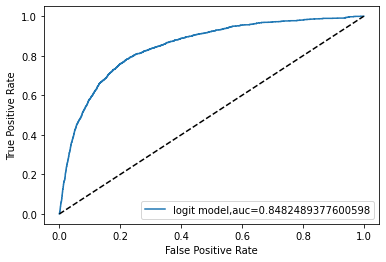

auc accuracy: 0.8482489377600598


In [32]:
# ROC Curve plotting and finding AUC value

Y_pred_proba=logreg.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(Y_test,Y_pred_proba)
auc=metrics.roc_auc_score(Y_test,Y_pred_proba)
plt.plot(fpr,tpr,label='logit model,auc='+str(auc))
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

print('auc accuracy:',auc)

In [33]:
## Therefore we have build and tested a Logistic Model and we have obtained AUC 
## Accuracy as 0.848(85%)